# Topic Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set()

In [2]:
sdg_data = pd.read_csv("data/sdg_data.csv", encoding = "ANSI", low_memory = False)

In [3]:
sdg_data.head()

,goal,priority,indicator_id,indicator_description,topic,series,country_code,location,age_group,sex,value_type,unit,year,value,country
0,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Both sexes or no breakdown by sex,NaN,Percent,2011,0.3001,Albania
1,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Female,NaN,Percent,2011,0.3252,Albania
2,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Male,NaN,Percent,2011,0.2765,Albania
3,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Both sexes or no breakdown by sex,NaN,Percent,2012,0.2680,Albania
4,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Female,NaN,Percent,2012,0.2861,Albania


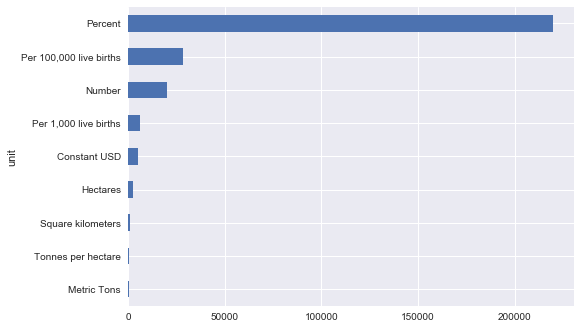

In [4]:
(sdg_data.groupby('unit')
    ['value']
    .count()
    .sort_values()
    .plot(kind='barh', ))

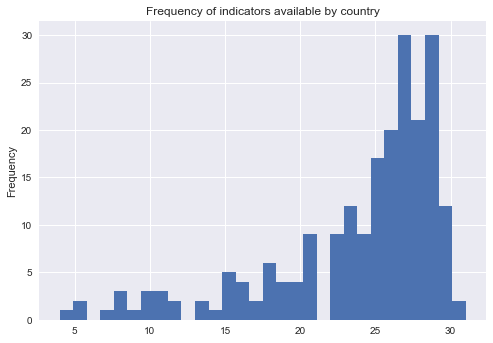

In [5]:
(sdg_data.groupby(['country', 'indicator_id'])
    .size()
    .reset_index()
    .groupby('country')
    .size()
    .sort_values()
    .plot(kind='hist', title = 'Frequency of indicators available by country',
          bins = 30)
)

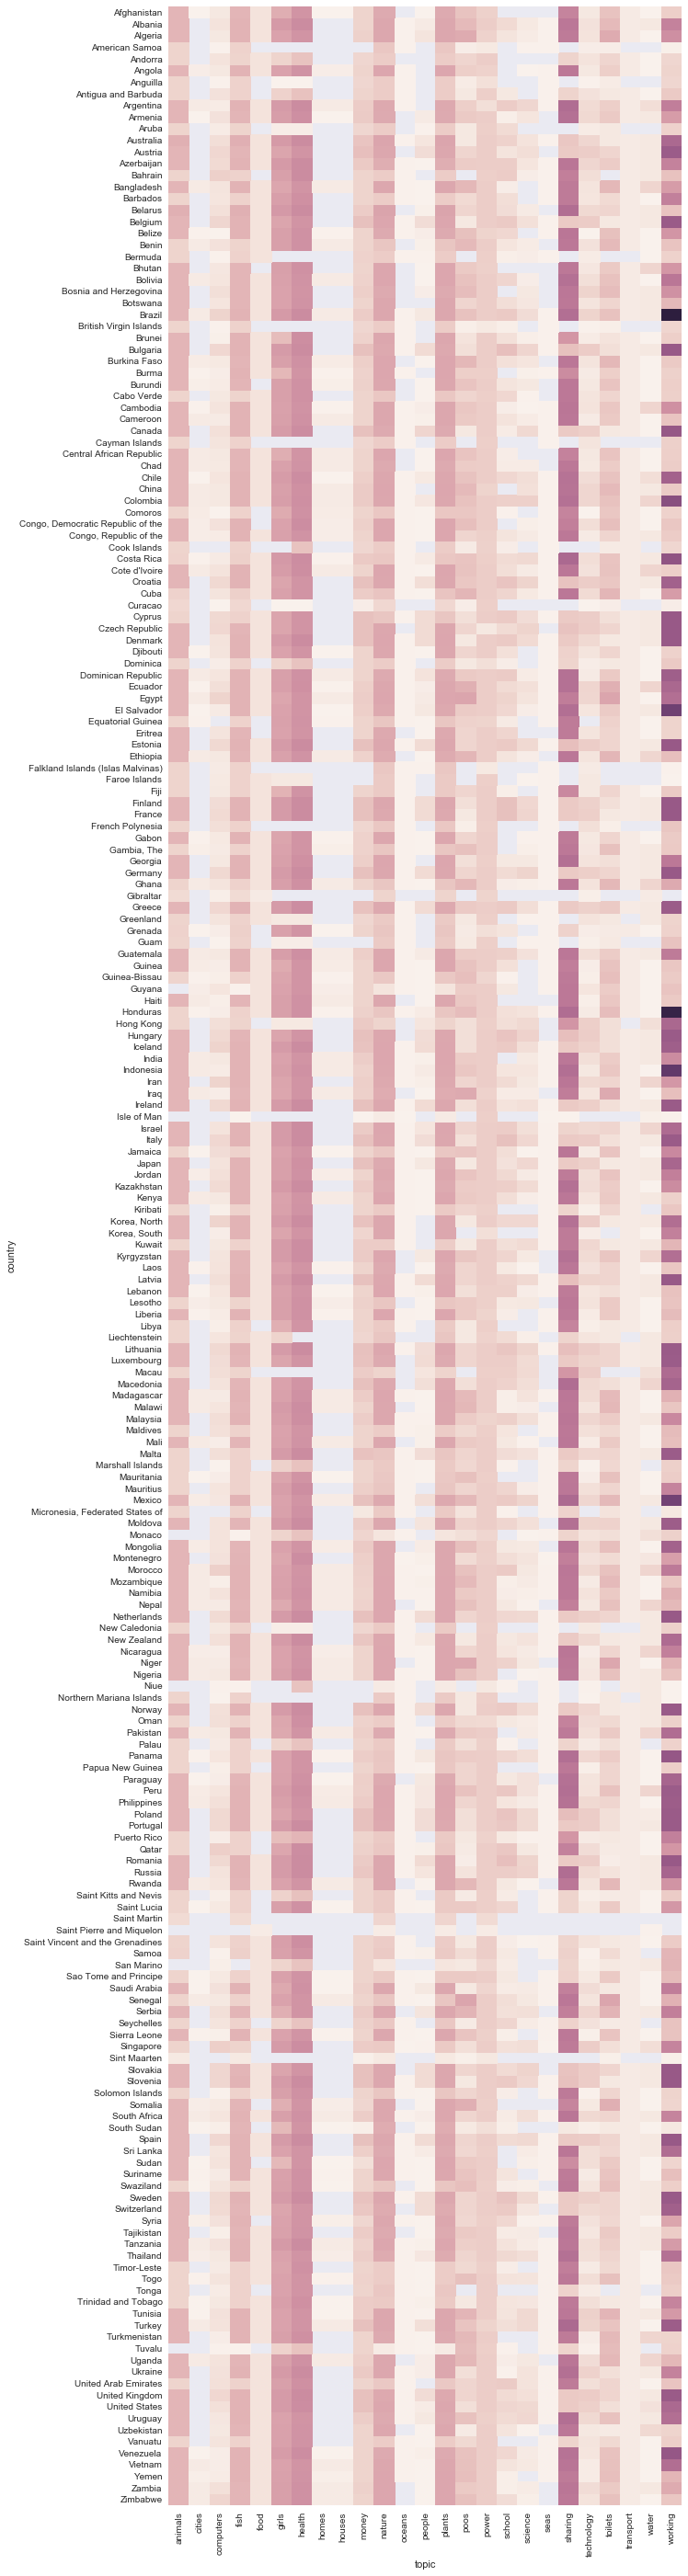

In [6]:
a4_dims = (10, 50)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.heatmap(
    sdg_data.pivot_table(
        columns=['topic'], index=['country'], 
        aggfunc='count', values=['series'])
        .loc[:,'series'],
    ax = ax, cbar = False
    )

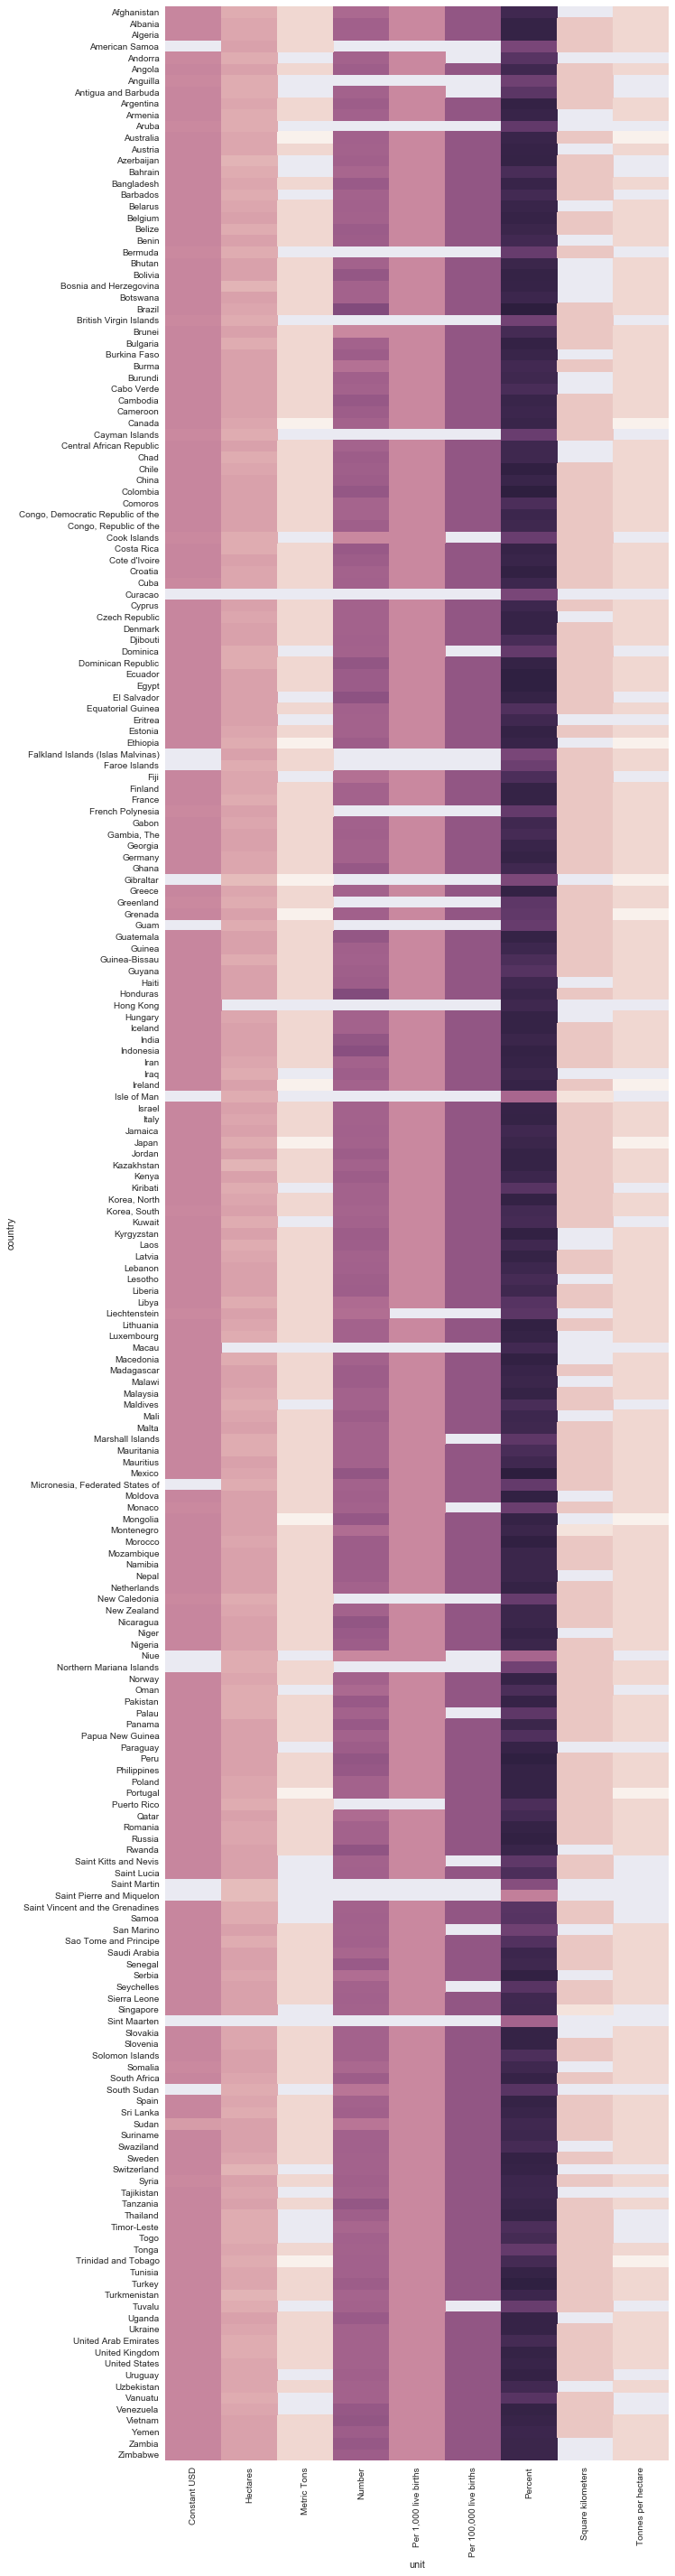

In [7]:
a4_dims = (10, 50)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.heatmap(
    sdg_data.pivot_table(
        columns=['unit'], index=['country'], 
        aggfunc='count', values=['series'])
        .loc[:,'series']
        .pipe(np.log10), 
    ax = ax, cbar = False
    )

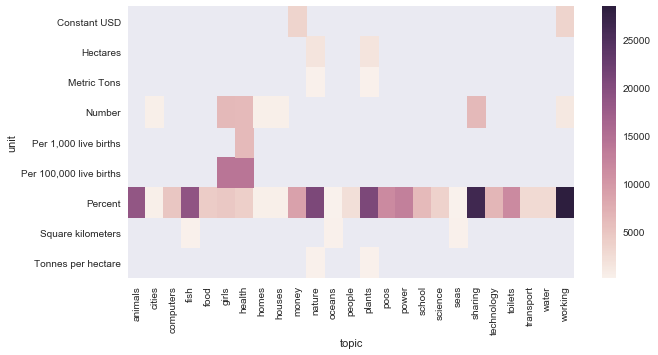

In [8]:
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.heatmap(
    sdg_data.pivot_table(
        columns=['topic'], index=['unit'], 
        aggfunc='count', values=['series'])
        .loc[:,'series'],
    ax = ax
    )

My idea at the moment is to try and handle only units that will improve the coverage of the indicators.

## Handling Percentages

The percentages make up the vast majority of the measures across the board. So we'll try to figure out a methodology for summarising them, and hopefully it can be extended to other measures as well.

In [9]:
is_perc = sdg_data.unit == "Percent"
sdg_data[is_perc].head()

,goal,priority,indicator_id,indicator_description,topic,series,country_code,location,age_group,sex,value_type,unit,year,value,country
0,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Both sexes or no breakdown by sex,NaN,Percent,2011,0.3001,Albania
1,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Female,NaN,Percent,2011,0.3252,Albania
2,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Male,NaN,Percent,2011,0.2765,Albania
3,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Both sexes or no breakdown by sex,NaN,Percent,2012,0.2680,Albania
4,8,110001,C080601,Proportion of youth (aged 15-24 years) not in ...,people,"Proportion of youth not in education, employme...",ALB,Total (national level),15 to 24 years old,Female,NaN,Percent,2012,0.2861,Albania


Now we simulate a country and topic selection:

In [20]:
print(", ".join(sorted(map(str, sdg_data.country.unique()))))

Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei, Bulgaria, Burkina Faso, Burma, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Cayman Islands, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Democratic Republic of the, Congo, Republic of the, Cook Islands, Costa Rica, Cote d'Ivoire, Croatia, Cuba, Curacao, Cyprus, Czech Republic, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Ethiopia, Falkland Islands (Islas Malvinas), Faroe Islands, Fiji, Finland, France, French Polynesia, Gabon, Gambia, The, Georgia, Germany, Ghana, Gibraltar, Greece, Greenland, Grenada, Guam, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hong Kon

In [21]:
", ".join(sorted(sdg_data.topic.unique()))

'animals, cities, computers, fish, food, girls, health, homes, houses, money, nature, oceans, people, plants, poos, power, school, science, seas, sharing, technology, toilets, transport, water, working'

In [22]:
import random

In [37]:
country = random.choice(sdg_data.country.unique())
topic = random.choice(sdg_data.topic.unique())

print(country, topic)

Greenland power


In [38]:
sdg_selection = sdg_data[
    np.logical_and(
        np.logical_and(
            is_perc, sdg_data.country == country),
        sdg_data.topic == topic)]

We then use the priority values to choose which indicator we should use first.

In [39]:
sdg_selection = sdg_selection[
    sdg_selection.priority == sdg_selection.priority.max()]

Some results will have multiple series

In [40]:
print('\n'.join(sdg_selection.series.unique()))

Renewable energy share in the total final energy consumption


In [41]:
sdg_selection.head()

,goal,priority,indicator_id,indicator_description,topic,series,country_code,location,age_group,sex,value_type,unit,year,value,country
144786,7,210724,C070201,Renewable energy share in the total final ener...,power,Renewable energy share in the total final ener...,GRL,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2000,0.0732,Greenland
144787,7,210724,C070201,Renewable energy share in the total final ener...,power,Renewable energy share in the total final ener...,GRL,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2001,0.0638,Greenland
144788,7,210724,C070201,Renewable energy share in the total final ener...,power,Renewable energy share in the total final ener...,GRL,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2002,0.0733,Greenland
144789,7,210724,C070201,Renewable energy share in the total final ener...,power,Renewable energy share in the total final ener...,GRL,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2003,0.0732,Greenland
144790,7,210724,C070201,Renewable energy share in the total final ener...,power,Renewable energy share in the total final ener...,GRL,Total (national level),All age ranges or no breakdown by age,Both sexes or no breakdown by sex,NaN,Percent,2004,0.0625,Greenland


In [42]:
field_count = (sdg_selection.iloc[:, :-2]
                   .apply(lambda x: len(x.unique()), axis = 0))

field_count

goal                      1
priority                  1
indicator_id              1
indicator_description     1
topic                     1
series                    1
country_code              1
location                  1
age_group                 1
sex                       1
value_type                1
unit                      1
year                     15
dtype: int64

In [43]:
field_count = (sdg_selection.iloc[:, :-2]
                   .apply(lambda x: len(x.unique()), axis = 0))

if field_count['series'] > 1:
    sdg_selection = sdg_selection[
        sdg_selection.series == (sdg_selection.groupby('series')['value']
                                              .count()
                                              .argmax())]
    field_count = (sdg_selection.iloc[:, :-2]
                   .apply(lambda x: len(x.unique()), axis = 0))
    
if field_count[field_count.index != 'series'].max() > 1:
    multi_field = field_count.argmax()
    multi_values = sdg_selection[multi_field].unique()

In [44]:
sdg_selection.pivot("year", multi_field, 'value').plot(
    marker='o', title = sdg_selection.indicator_description.values[0])

ValueError: Ambiguous reference to year. The index names are not unique.

In [49]:
sdg_selection.pivot("year", multi_field, 'value').tail()

ValueError: Ambiguous reference to year. The index names are not unique.

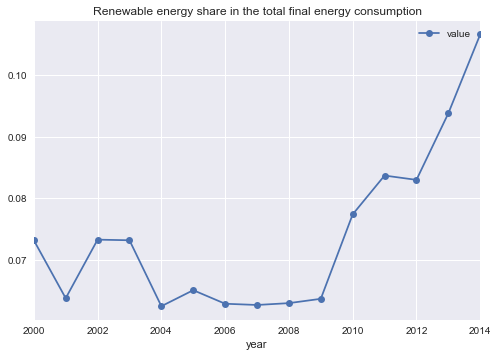

In [50]:
sdg_selection.plot(x = 'year', y = 'value',
                   title = sdg_selection.indicator_description.values[0], marker = 'o')

In [45]:
sdg_topic_selection = sdg_data[np.logical_and(is_perc, sdg_data.topic == topic)]

In [46]:
sdg_topic_selection = sdg_topic_selection[
    sdg_topic_selection.priority == sdg_topic_selection.priority.max()]

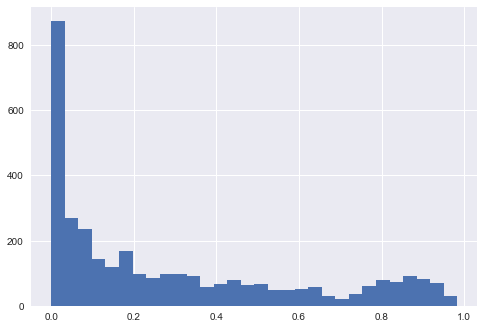

In [47]:
sdg_topic_selection.value.hist(bins=30)

Renewable energy share in the total final energy consumption


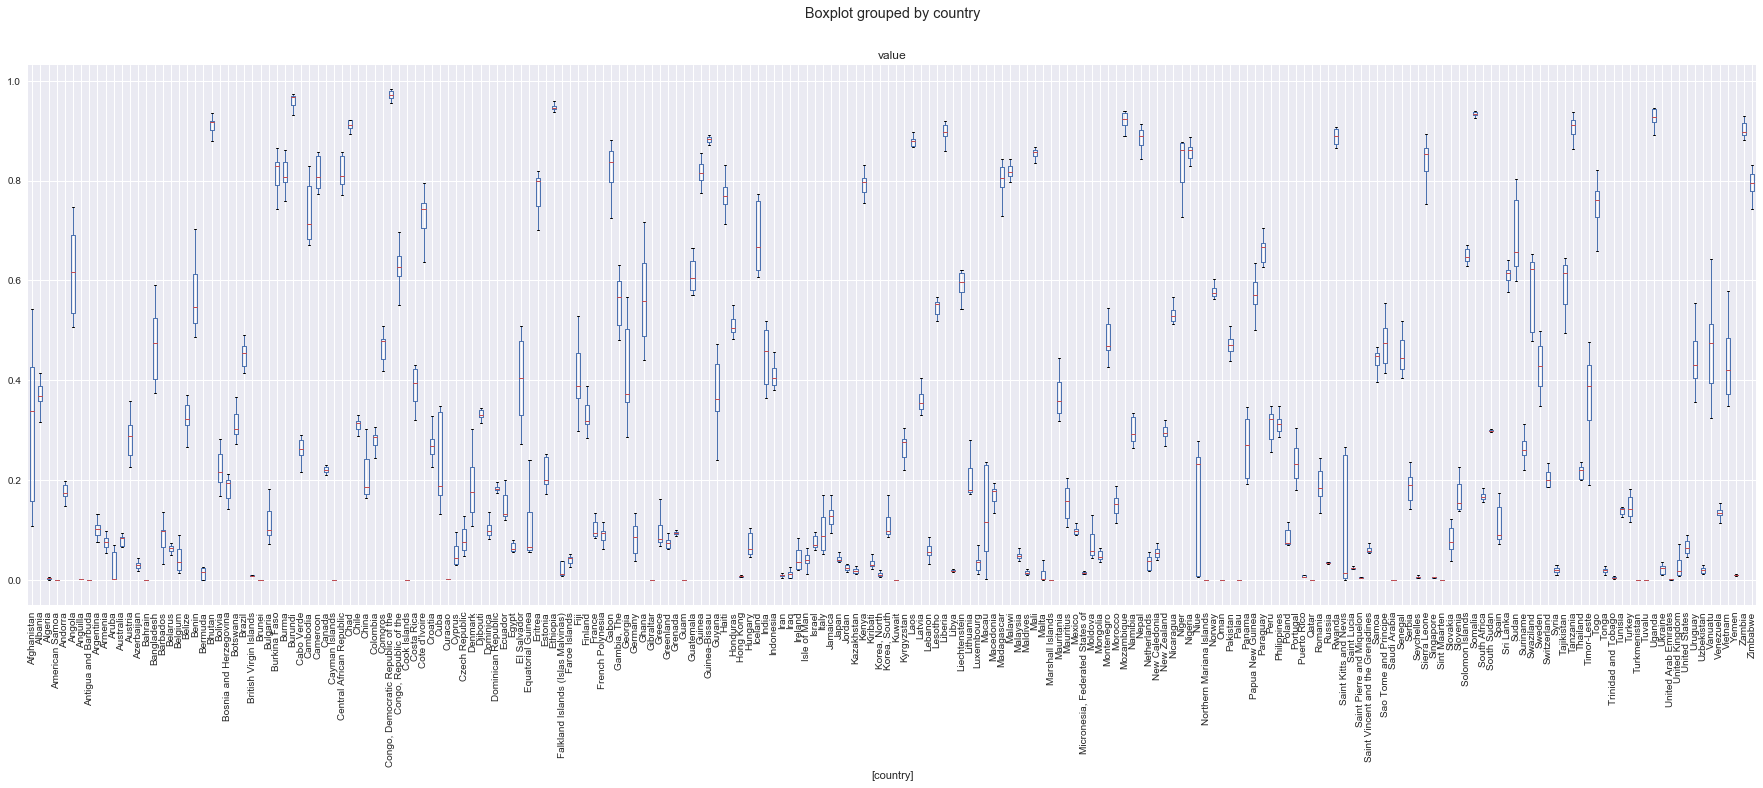

In [48]:
print(sdg_selection.indicator_description.values[0])
sdg_topic_selection.boxplot(
    by = ['country'], column='value', rot=90, figsize = (30, 10))